In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from uncertainties import ufloat
from ctypes import c_double

import ROOT
import math
ROOT.EnableImplicitMT()    # Tells ROOT to go parallel

/groups/hephy/cms/alikaan.gueven/conda/envs/SDV/lib/python3.11/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Welcome to JupyROOT 6.28/00


In [2]:
import os

unique_dir = "vtx_PART_770_epoch_83"# "vtx_PART_525best_valloss_epoch_ML3"

# ------------------------------------------------
sig_tag  = 'stop_M600_585_ct20_2018'



# histname = "MET_pt_corr_vs_Max_ML_score_clone2"
histname = "leading_vtx_ML1_vs_leading_vtx_ML2"
# histname = "ML1_vs_ML2"
# histname = "leading_score1_vs_leading_score2"
tdir     = "all_evt"
# tdir = "all_SDVSecVtx_all"




bkg_dir = "/scratch-cbe/users/alikaan.gueven/AN_plots/ParT_hists/" + unique_dir + "/bkg"
sig_dir = "/scratch-cbe/users/alikaan.gueven/AN_plots/ParT_hists/" + unique_dir + "/sig"



sig_file = ROOT.TFile(os.path.join(sig_dir, f"{sig_tag}_hist.root"))
sig_dir  = getattr(sig_file, tdir)
sig_hist = getattr(sig_dir, histname).Clone()


bkg_file = ROOT.TFile(os.path.join(bkg_dir, f"all_2018_hist.root"))
bkg_dir  = getattr(bkg_file, tdir)
bkg_hist = getattr(bkg_dir, histname).Clone()

In [3]:
x_binwidth = sig_hist.GetXaxis().GetBinWidth(1)
y_binwidth = sig_hist.GetYaxis().GetBinWidth(1)

In [4]:
xax = sig_hist.GetXaxis()
yax = sig_hist.GetYaxis()

x_min = xax.GetBinLowEdge(1)
x_max = xax.GetBinUpEdge(xax.GetLast())

y_min = yax.GetBinLowEdge(1)
y_max = yax.GetBinUpEdge(yax.GetLast())

print(x_min, x_max, x_binwidth)
print(y_min, y_max, y_binwidth)

0.0 1.0 0.005
0.0 1.0 0.005


In [17]:
ds = 1 # downsample

MET_boundaryList     = np.arange(x_min + x_binwidth* ds, x_max, x_binwidth* ds)
MLScore_boundaryList = np.arange(y_min + y_binwidth* ds, y_max, y_binwidth* ds)

In [18]:
def sig(s,b,b_err):
  eps = 5e-1
  b     = max(b,     eps)
  b_err = max(b_err, eps)
  val = (2*((s+b)*np.log(((s+b)*(b+b_err*b_err))/(b*b+(s+b)*b_err*b_err)) -
        (b*b/(b_err*b_err))*np.log(1+(b_err*b_err*s)/(b*(b+b_err*b_err)))))
  return np.sqrt(max(0, val))

In [19]:
significances_dir = '/scratch-cbe/users/alikaan.gueven/AN_plots/ParT_hists/'+ unique_dir + '/significances'
os.makedirs(significances_dir, exist_ok=True)

In [20]:
y_binwidth

0.005

In [21]:
significances_dir

'/scratch-cbe/users/alikaan.gueven/AN_plots/ParT_hists/vtx_PART_770_epoch_83/significances'

In [22]:
MET_boundaryList

array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135,
       0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 ,
       0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225,
       0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265, 0.27 ,
       0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 , 0.315,
       0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355, 0.36 ,
       0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  , 0.405,
       0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445, 0.45 ,
       0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 , 0.495,
       0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
       0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
       0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
       0.635, 0.64 ,

In [23]:
MET_step = MET_boundaryList[1] - MET_boundaryList[0]
MLScore_step = MLScore_boundaryList[1] - MLScore_boundaryList[0]

print(MET_boundaryList)
print(MLScore_boundaryList)

MLScore_min = bkg_hist.GetYaxis().FindBin(0)

empty_df = pd.DataFrame(columns=np.arange(MET_boundaryList[0], MET_boundaryList[-1]+MET_step, MET_step),
                        index=  np.arange(MLScore_boundaryList[0], MLScore_boundaryList[-1]+MLScore_step, MLScore_step),
                        dtype= float)

# Create empty tables
tableNames = ['sig_SPRA', 'sig_SPRB', 'sig_SPRC', 'sig_SPRD',
              'bkg_SPRA', 'bkg_SPRB', 'bkg_SPRC', 'bkg_SPRD',
              'sig_SPRA_unc', 'sig_SPRB_unc', 'sig_SPRC_unc', 'sig_SPRD_unc',
              'bkg_SPRA_unc', 'bkg_SPRB_unc', 'bkg_SPRC_unc', 'bkg_SPRD_unc',
              'bkg_SPRA_pred', 'bkg_SPRA_pred_unc',
              'Z_SPRA', 'Z_SPRB', 'Z_SPRC', 'Z_SPRD', 'Z_SPRA_pred'     # Z is the significance
              ]

tables = dict()
for name in tableNames:
    tables[name] = empty_df.copy()



store = pd.HDFStore(os.path.join(significances_dir, 'dataframes_ML.h5'))

bkgScale = 1 # (100. / 60.)
sigScale = 1 # (100. / 60.) * (6.83 / 205.)


    
for MET_boundary in MET_boundaryList:
    for MLScore_boundary in MLScore_boundaryList:

        MET_lo    = 0 # -> bin index
        MET_up    = bkg_hist.GetNbinsX()+1
        MET_bound = bkg_hist.GetXaxis().FindBin(MET_boundary)

        MLScore_lo    = 0 # -> bin index
        MLScore_up    = bkg_hist.GetNbinsY()+1
        MLScore_bound = bkg_hist.GetYaxis().FindBin(MLScore_boundary)

        x = c_double(0.0)
        SPRA = ufloat(bkg_hist.IntegralAndError(MET_bound, MET_up, MLScore_bound, MLScore_up,       x), x.value) * bkgScale
        SPRB = ufloat(bkg_hist.IntegralAndError(MET_lo, MET_bound-1, MLScore_bound, MLScore_up,     x), x.value) * bkgScale
        SPRC = ufloat(bkg_hist.IntegralAndError(MET_bound, MET_up, MLScore_min, MLScore_bound-1,     x), x.value) * bkgScale
        SPRD = ufloat(bkg_hist.IntegralAndError(MET_lo, MET_bound-1, MLScore_min, MLScore_bound-1,   x), x.value) * bkgScale

        eps = 5e-1

        tables['bkg_SPRA'].loc[MLScore_boundary, MET_boundary] = max(eps, SPRA.n) # max: in case there are negative bins
        tables['bkg_SPRB'].loc[MLScore_boundary, MET_boundary] = max(eps, SPRB.n)
        tables['bkg_SPRC'].loc[MLScore_boundary, MET_boundary] = max(eps, SPRC.n)
        tables['bkg_SPRD'].loc[MLScore_boundary, MET_boundary] = max(eps, SPRD.n)

        tables['bkg_SPRA_unc'].loc[MLScore_boundary, MET_boundary] = max(eps, SPRA.s)
        tables['bkg_SPRB_unc'].loc[MLScore_boundary, MET_boundary] = max(eps, SPRB.s)
        tables['bkg_SPRC_unc'].loc[MLScore_boundary, MET_boundary] = max(eps, SPRC.s)
        tables['bkg_SPRD_unc'].loc[MLScore_boundary, MET_boundary] = max(eps, SPRD.s)


        bkg_SPRA_pred = (SPRC / SPRD) * SPRB if SPRD != 0 else ufloat(0, 0)
        tables['bkg_SPRA_pred'].loc[MLScore_boundary, MET_boundary] =     max(eps, bkg_SPRA_pred.n)
        tables['bkg_SPRA_pred_unc'].loc[MLScore_boundary, MET_boundary] = max(eps, bkg_SPRA_pred.s)
 

        ### SIGNAL PART

        x = c_double(0.0)
        SPRA = ufloat(sig_hist.IntegralAndError(MET_bound, MET_up, MLScore_bound, MLScore_up,       x), x.value) * sigScale
        SPRB = ufloat(sig_hist.IntegralAndError(MET_lo, MET_bound-1, MLScore_bound, MLScore_up,     x), x.value) * sigScale
        SPRC = ufloat(sig_hist.IntegralAndError(MET_bound, MET_up, MLScore_lo, MLScore_bound-1,     x), x.value) * sigScale
        SPRD = ufloat(sig_hist.IntegralAndError(MET_lo, MET_bound-1, MLScore_lo, MLScore_bound-1,   x), x.value) * sigScale


        tables['sig_SPRA'].loc[MLScore_boundary, MET_boundary] = SPRA.n
        tables['sig_SPRB'].loc[MLScore_boundary, MET_boundary] = SPRB.n
        tables['sig_SPRC'].loc[MLScore_boundary, MET_boundary] = SPRC.n
        tables['sig_SPRD'].loc[MLScore_boundary, MET_boundary] = SPRD.n

        tables['sig_SPRA_unc'].loc[MLScore_boundary, MET_boundary] = SPRA.s
        tables['sig_SPRB_unc'].loc[MLScore_boundary, MET_boundary] = SPRB.s
        tables['sig_SPRC_unc'].loc[MLScore_boundary, MET_boundary] = SPRC.s
        tables['sig_SPRD_unc'].loc[MLScore_boundary, MET_boundary] = SPRD.s

        Z_SPRA      = ROOT.RooStats.AsimovSignificance(tables['sig_SPRA'].loc[MLScore_boundary, MET_boundary],
                                                       tables['bkg_SPRA'].loc[MLScore_boundary, MET_boundary],
                                                       tables['bkg_SPRA_unc'].loc[MLScore_boundary, MET_boundary])
        Z_SPRB      = ROOT.RooStats.AsimovSignificance(tables['sig_SPRB'].loc[MLScore_boundary, MET_boundary],
                                                       tables['bkg_SPRB'].loc[MLScore_boundary, MET_boundary],
                                                       tables['bkg_SPRB_unc'].loc[MLScore_boundary, MET_boundary])
        Z_SPRC      = ROOT.RooStats.AsimovSignificance(tables['sig_SPRC'].loc[MLScore_boundary, MET_boundary],
                                                       tables['bkg_SPRC'].loc[MLScore_boundary, MET_boundary],
                                                       tables['bkg_SPRC_unc'].loc[MLScore_boundary, MET_boundary])
        Z_SPRD      = ROOT.RooStats.AsimovSignificance(tables['sig_SPRD'].loc[MLScore_boundary, MET_boundary],
                                                       tables['bkg_SPRD'].loc[MLScore_boundary, MET_boundary],
                                                       tables['bkg_SPRD_unc'].loc[MLScore_boundary, MET_boundary])
        Z_SPRA_pred = ROOT.RooStats.AsimovSignificance(tables['sig_SPRA'].loc[MLScore_boundary, MET_boundary],
                                                       tables['bkg_SPRA_pred'].loc[MLScore_boundary, MET_boundary],
                                                       tables['bkg_SPRA_pred_unc'].loc[MLScore_boundary, MET_boundary])
        
        tables['Z_SPRA'].loc[MLScore_boundary, MET_boundary]      = Z_SPRA
        tables['Z_SPRB'].loc[MLScore_boundary, MET_boundary]      = Z_SPRB
        tables['Z_SPRC'].loc[MLScore_boundary, MET_boundary]      = Z_SPRC
        tables['Z_SPRD'].loc[MLScore_boundary, MET_boundary]      = Z_SPRD
        tables['Z_SPRA_pred'].loc[MLScore_boundary, MET_boundary] = Z_SPRA_pred



# Save the tables to the store.
# ----------------------------------------------------------------

for tableName in tableNames:
    store[f"{sig_tag}_{tableName}"] = tables[tableName]
    print(f"Table {tableName} saved to the store.")

[0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06
 0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115 0.12
 0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18
 0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235 0.24
 0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295 0.3
 0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355 0.36
 0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415 0.42
 0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475 0.48
 0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535 0.54
 0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595 0.6
 0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655 0.66
 0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715 0.72
 0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775 0.78
 0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.82  0.825 0.83  0.835

/groups/hephy/cms/alikaan.gueven/conda/envs/SDV/lib/python3.11/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


Table sig_SPRA saved to the store.
Table sig_SPRB saved to the store.
Table sig_SPRC saved to the store.
Table sig_SPRD saved to the store.
Table bkg_SPRA saved to the store.
Table bkg_SPRB saved to the store.
Table bkg_SPRC saved to the store.
Table bkg_SPRD saved to the store.
Table sig_SPRA_unc saved to the store.
Table sig_SPRB_unc saved to the store.
Table sig_SPRC_unc saved to the store.
Table sig_SPRD_unc saved to the store.
Table bkg_SPRA_unc saved to the store.
Table bkg_SPRB_unc saved to the store.
Table bkg_SPRC_unc saved to the store.
Table bkg_SPRD_unc saved to the store.
Table bkg_SPRA_pred saved to the store.
Table bkg_SPRA_pred_unc saved to the store.
Table Z_SPRA saved to the store.
Table Z_SPRB saved to the store.
Table Z_SPRC saved to the store.
Table Z_SPRD saved to the store.
Table Z_SPRA_pred saved to the store.


In [24]:
# store.keys()
# store = pd.HDFStore(os.path.join(significances_dir, 'dataframes.h5'), 'r')
# store.close()

In [25]:
tag=sig_tag
to_cut = 0.50

cols = store[tag + '_Z_SPRA'].columns.to_numpy()
index = cols = store[tag + '_Z_SPRA'].index.to_numpy()

c_ix = np.where((cols-to_cut)==0)[0][0]
i_ix = np.where((index-to_cut)==0)[0][0]

In [26]:
store['stop_M600_585_ct20_2018_bkg_SPRA'].loc[0.94:, 0.94:]

,0.940,0.945,0.950,0.955,0.960,0.965,0.970,0.975,0.980,0.985,0.990,0.995
0.940,152.038615,95.282055,79.366547,64.562419,53.907675,41.093611,32.266241,20.716343,13.516547,7.063390,2.532403,0.5
0.945,140.289981,84.153249,70.293721,56.993686,46.842103,35.400992,27.712032,19.156805,12.405453,6.071018,1.643742,0.5
0.950,126.210775,70.736365,64.857765,52.239806,42.964149,33.443970,25.349855,17.842703,11.695009,6.037110,1.196573,0.5
0.955,71.528688,55.533342,50.642482,38.129496,32.163700,24.920966,21.520142,14.980178,9.029331,4.882257,1.196573,0.5
0.960,62.234217,48.302121,45.778533,33.686487,28.872299,23.378603,20.939014,14.827921,8.140312,4.329105,1.196573,0.5
0.965,50.804604,45.181626,43.046674,31.444180,26.459582,22.414160,20.287738,14.710533,8.209593,4.482903,1.080750,0.5
0.970,34.575926,30.675669,29.885194,25.261557,21.170136,18.207469,16.804649,11.690525,6.902736,3.983712,0.620455,0.5
0.975,21.790956,20.135235,20.245818,18.883205,16.240880,14.408248,13.315154,9.247652,5.613618,2.958781,0.500000,0.5
0.980,14.428092,14.082174,14.230321,13.056824,11.324406,11.107124,9.556560,6.664136,4.587615,2.173844,0.500000,0.5
0.985,9.771097,9.672159,10.444554,9.789237,8.225226,8.526109,7.994183,5.818137,4.227838,2.084753,0.500000,0.5


In [27]:
sigma_b = c_double(0.0)

x_lo = 0.95
y_lo = 0.95

x_hi = 1.00
y_hi = 1.00

b = bkg_hist.IntegralAndError(bkg_hist.GetXaxis().FindBin(x_lo),
                              bkg_hist.GetXaxis().FindBin(x_hi),
                              bkg_hist.GetYaxis().FindBin(y_lo),
                              bkg_hist.GetYaxis().FindBin(y_hi),
                              sigma_b)
print(round(b, 3), '+/-', round(sigma_b.value, 3))

sigma_s = c_double(0.0)

s = sig_hist.IntegralAndError(sig_hist.GetXaxis().FindBin(x_lo),
                              sig_hist.GetXaxis().FindBin(x_hi),
                              sig_hist.GetYaxis().FindBin(y_lo),
                              sig_hist.GetYaxis().FindBin(y_hi),
                              sigma_s)
print(round(s, 3), '+/-', round(sigma_s.value, 3))

print(ROOT.RooStats.AsimovSignificance(s,b,sigma_b))

64.858 +/- 7.286
213.882 +/- 3.678
12.701885689315398


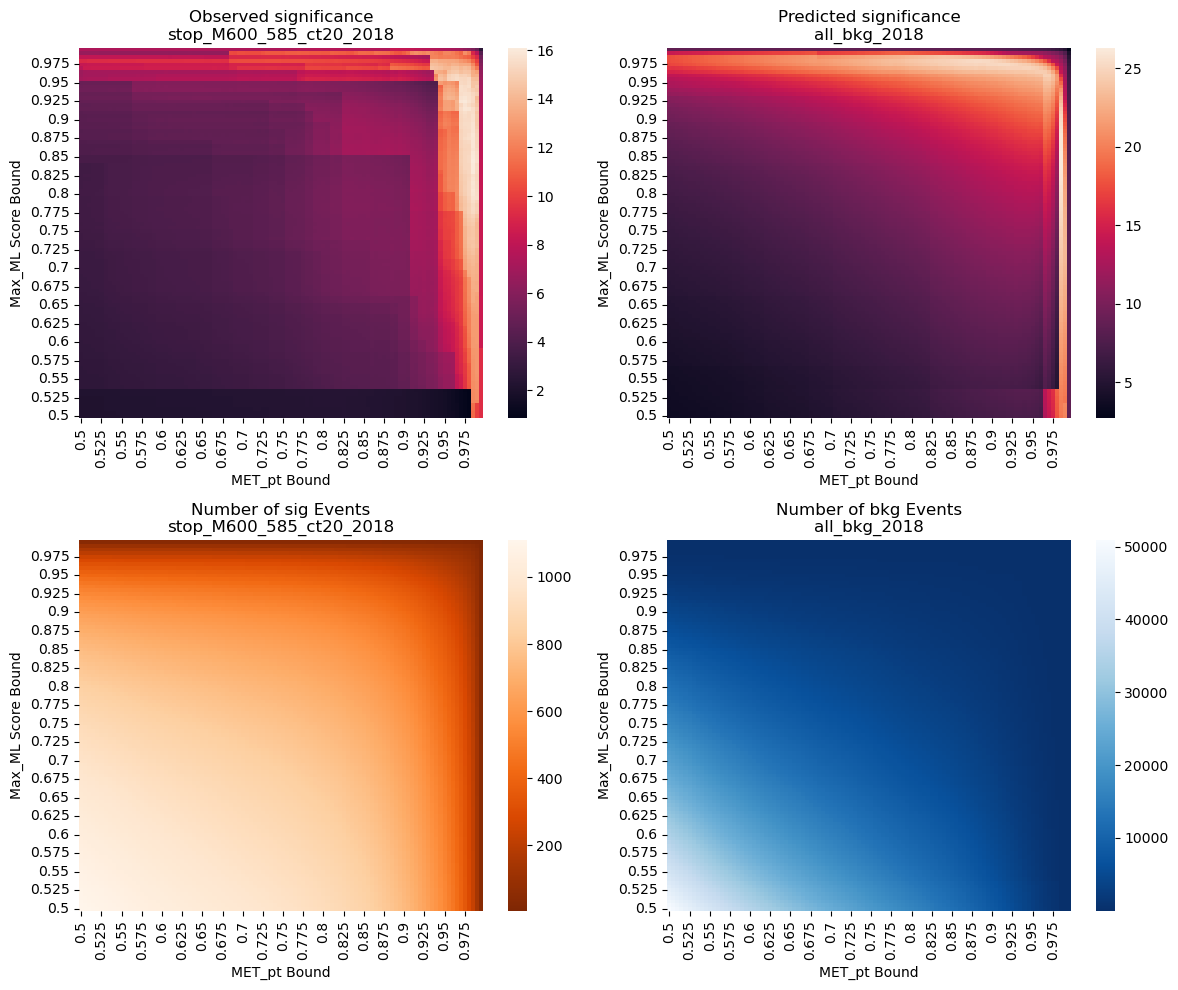

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))


ylabel = 'Max_ML Score Bound'
xlabel = 'MET_pt Bound'

plot_lowerBound = y_min

# Observed significance plot
sns.heatmap(store[tag + '_Z_SPRA'].iloc[c_ix:, i_ix:], ax=axs[0,0])
axs[0,0].set(xlabel=xlabel, ylabel=ylabel, title='Observed significance\n' + tag)
axs[0,0].set_xticklabels([*map(lambda x: round(float(x.get_text()), 4), axs[0,0].get_xticklabels())])
axs[0,0].set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), axs[0,0].get_yticklabels())])
axs[0,0].invert_yaxis()

# Predicted significance plot
sns.heatmap(store[tag + '_Z_SPRA_pred'].iloc[c_ix:, i_ix:], ax=axs[0,1])
axs[0,1].set(xlabel=xlabel, ylabel=ylabel, title='Predicted significance\n' + 'all_bkg_2018')
axs[0,1].set_xticklabels([*map(lambda x: round(float(x.get_text()), 4), axs[0,1].get_xticklabels())])
axs[0,1].set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), axs[0,1].get_yticklabels())])
axs[0,1].invert_yaxis()

# Signal plot
sns.heatmap(store[tag + '_sig_SPRA'].iloc[c_ix:, i_ix:], cmap='Oranges_r', ax=axs[1,0])
axs[1,0].set(xlabel=xlabel, ylabel=ylabel, title='Number of sig Events\n' + tag)
axs[1,0].set_xticklabels([*map(lambda x: round(float(x.get_text()), 4), axs[1,0].get_xticklabels())])
axs[1,0].set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), axs[1,0].get_yticklabels())])
axs[1,0].invert_yaxis()

# Background plot
sns.heatmap(store[tag + '_bkg_SPRA'].iloc[c_ix:, i_ix:], cmap='Blues_r', ax=axs[1,1])
axs[1,1].set(xlabel=xlabel, ylabel=ylabel, title='Number of bkg Events\n' + 'all_bkg_2018')
axs[1,1].set_xticklabels([*map(lambda x: round(float(x.get_text()), 4), axs[1,1].get_xticklabels())])
axs[1,1].set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), axs[1,1].get_yticklabels())])
axs[1,1].invert_yaxis()

fig.tight_layout()
fig.show()


In [62]:
# df_tmp[df_tmp < 0.2]

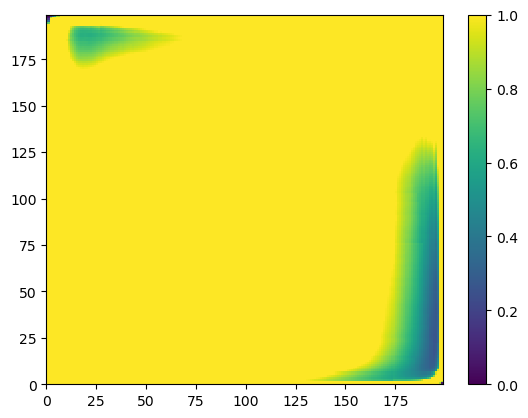

In [63]:
df_tmp = (store[sig_tag + '_bkg_SPRA'] * store[sig_tag + '_bkg_SPRD'])/ (store[sig_tag + '_bkg_SPRB'] * store[sig_tag + '_bkg_SPRC'])
df_tmp = df_tmp.loc[0:, 0:]
plt.pcolormesh(df_tmp.T)
plt.colorbar()
plt.clim(0,1)

In [66]:
df_tmp.iloc[-1,-20:]

0.900      250.380558
0.905      275.187863
0.910      302.113061
0.915      337.375425
0.920      380.741325
0.925      122.569227
0.930      141.906982
0.935      154.326146
0.940      183.425299
0.945      222.548138
0.950      245.860802
0.955      325.917462
0.960      416.460726
0.965      490.429721
0.970      817.512748
0.975     1127.251218
0.980     2432.690187
0.985     6002.506609
0.990     9910.724509
0.995    43517.880440
Name: 0.995, dtype: float64

In [97]:
a = 0.90
b = 0.90


A = ufloat(store[sig_tag + '_bkg_SPRA'].loc[a, b], store[sig_tag + '_bkg_SPRA_unc'].loc[a, b])
B = ufloat(store[sig_tag + '_bkg_SPRB'].loc[a, b], store[sig_tag + '_bkg_SPRB_unc'].loc[a, b])
C = ufloat(store[sig_tag + '_bkg_SPRC'].loc[a, b], store[sig_tag + '_bkg_SPRC_unc'].loc[a, b])
D = ufloat(store[sig_tag + '_bkg_SPRD'].loc[a, b], store[sig_tag + '_bkg_SPRD_unc'].loc[a, b])

print(D/C)
print(B/A)

17.04+/-0.18
6.37+/-0.28


In [99]:
print((D*A)/(B*C))

2.68+/-0.12


In [61]:
print(round(store[sig_tag + "_bkg_SPRB"].index[-1], 6))
print(round(store[sig_tag + "_bkg_SPRB"].columns[3], 0))

0.995
0.0


In [62]:
store[sig_tag + '_Z_SPRA'].loc[0.999:, :450]

,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045,0.050,...,0.950,0.955,0.960,0.965,0.970,0.975,0.980,0.985,0.990,0.995


In [63]:
store[sig_tag + '_Z_SPRA'].iloc[-2,3]

6.723380264291893

In [64]:
# print(f'SPRA: {store[sig_tag + "_bkg_SPRA"].iloc[-8,3]} +/- {store[sig_tag + "_bkg_SPRA_unc"].iloc[-8,3]}')
print(f'SPRB: {store[sig_tag + "_bkg_SPRB"].iloc[-2,3]} +/- {store[sig_tag + "_bkg_SPRB_unc"].iloc[-2,3]}')
print(f'SPRC: {store[sig_tag + "_bkg_SPRC"].iloc[-2,3]} +/- {store[sig_tag + "_bkg_SPRC_unc"].iloc[-2,3]}')
print(f'SPRD: {store[sig_tag + "_bkg_SPRD"].iloc[-2,3]} +/- {store[sig_tag + "_bkg_SPRD_unc"].iloc[-2,3]}')


SPRB: 80.39576476559647 +/- 8.603345024632533
SPRC: 1914858.5142006367 +/- 2987.476653354131
SPRD: 322986.5015383889 +/- 1064.9707586413715


In [65]:
f_B = ufloat(64.95118090785805, 10.24168017233881) / ufloat(129.74137883499245, 18.46953400253708)
f_C = ufloat(4972.575722054323, 63.20730017273657) / ufloat(9642.685986809784, 100.02463163394061)
f_D = ufloat(95650.71685582052, 838.9132564909049) / ufloat(208527.3141139648, 1311.1127886045672)

print("f_B:", f_B)
print("f_C:", f_C)
print("f_D:", f_D)

f_B: 0.50+/-0.11
f_C: 0.516+/-0.008
f_D: 0.459+/-0.005


In [66]:
(f_C/f_D) * f_B * ufloat(129.74137883499245, 18.46953400253708)

73.02055892221767+/-18.728064863359897

In [67]:
store[tag + '_sig_SPRB'].loc[0.999:, :450]

,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045,0.050,...,0.950,0.955,0.960,0.965,0.970,0.975,0.980,0.985,0.990,0.995


In [68]:
store[tag + '_bkg_SPRA'].loc[0.999:, :450]

,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045,0.050,...,0.950,0.955,0.960,0.965,0.970,0.975,0.980,0.985,0.990,0.995


In [69]:
store[tag + '_sig_SPRA'].loc[0.998:]

,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045,0.050,...,0.950,0.955,0.960,0.965,0.970,0.975,0.980,0.985,0.990,0.995


In [70]:
store[tag + '_bkg_SPRA'].loc[0.998:]

,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045,0.050,...,0.950,0.955,0.960,0.965,0.970,0.975,0.980,0.985,0.990,0.995


In [71]:
store[tag + '_signifTable'].loc[0.995:, 200:500]

KeyError: 'No object named stop_M600_585_ct20_2018_signifTable in the file'

In [72]:
print(store[tag + '_signifTable'].loc[0.999:, 200:500].to_markdown())

KeyError: 'No object named stop_M600_585_ct20_2018_signifTable in the file'

In [73]:
iML  = -12
iMET = +4
sysUnc = 0.20

print(f"Regions for {sig_tag} (with {sysUnc*100:.0f}% bkg syst. unc.)")
print("Integrated luminosity = 100 fb-1")
print("Cross-section is scaled down to 6.83 fb")
print()
print(f"ML_cut:  {store[sig_tag + '_sig_SPRA_Table'].index[iML]:.5f}")
print(f"MET_cut: {store[sig_tag + '_sig_SPRA_Table'].columns[iMET]:.0f}")
print()

print("Signal")
print("."*40)
print("A: ", round(store[sig_tag + '_sig_SPRA_Table'].iloc[iML,iMET], 2))
print("B: ", round(store[sig_tag + '_sig_SPRB_Table'].iloc[iML,iMET], 2))
print("C: ", round(store[sig_tag + '_sig_SPRC_Table'].iloc[iML,iMET], 2))
print("D: ", round(store[sig_tag + '_sig_SPRD_Table'].iloc[iML,iMET], 2))
print()
print("Background")
print("."*40)
print("A: ", round(store[sig_tag + '_bkg_SPRA_Table'].iloc[iML,iMET], 2))
print("B: ", round(store[sig_tag + '_bkg_SPRB_Table'].iloc[iML,iMET], 2))
print("C: ", round(store[sig_tag + '_bkg_SPRC_Table'].iloc[iML,iMET], 2))
print("D: ", round(store[sig_tag + '_bkg_SPRD_Table'].iloc[iML,iMET], 2))
print()
print("ROOT RooStats AsimovSignificance")
print("."*40)
print("A: ", round(ROOT.RooStats.AsimovSignificance(store[sig_tag + '_sig_SPRA_Table'].iloc[iML,iMET],
                                                    store[sig_tag + '_bkg_SPRA_Table'].iloc[iML,iMET],
                                                    store[sig_tag + '_bkg_SPRA_Table'].iloc[iML,iMET] * sysUnc), 2))

print("B: ", round(ROOT.RooStats.AsimovSignificance(store[sig_tag + '_sig_SPRB_Table'].iloc[iML,iMET],
                                                    store[sig_tag + '_bkg_SPRB_Table'].iloc[iML,iMET],
                                                    store[sig_tag + '_bkg_SPRB_Table'].iloc[iML,iMET] * sysUnc), 2))

print("C: ", round(ROOT.RooStats.AsimovSignificance(store[sig_tag + '_sig_SPRC_Table'].iloc[iML,iMET],
                                                    store[sig_tag + '_bkg_SPRC_Table'].iloc[iML,iMET],
                                                    store[sig_tag + '_bkg_SPRC_Table'].iloc[iML,iMET] * sysUnc), 2))

print("D: ", round(ROOT.RooStats.AsimovSignificance(store[sig_tag + '_sig_SPRD_Table'].iloc[iML,iMET],
                                                    store[sig_tag + '_bkg_SPRD_Table'].iloc[iML,iMET],
                                                    store[sig_tag + '_bkg_SPRD_Table'].iloc[iML,iMET] * sysUnc), 2))



Regions for stop_M600_585_ct20_2018 (with 20% bkg syst. unc.)
Integrated luminosity = 100 fb-1
Cross-section is scaled down to 6.83 fb



KeyError: 'No object named stop_M600_585_ct20_2018_sig_SPRA_Table in the file'

In [74]:
store[tag + '_sigTable'].loc[0.9970:, 200:500]

KeyError: 'No object named stop_M600_585_ct20_2018_sigTable in the file'

In [75]:
store[tag + '_bkgTable'].loc[0.9970:, 200:500]

KeyError: 'No object named stop_M600_585_ct20_2018_bkgTable in the file'

In [76]:
sig(146.269714, 0, 0)

17.644047876790996

In [ ]:
store[tag + '_bkgpredTable'].loc[3.5:4.0]

In [ ]:
store[tag + '_sigTable'].loc[0.998:0.999]

In [ ]:
store[tag + '_signifTable'].loc[3.5:4.0]

In [ ]:
store[tag + '_signifpredTable'].loc[3.5:4.0]

In [ ]:
store[tag + '_signifTable'].loc[0.998:0.999]

In [ ]:
tmp_df = store[tag + '_signifTable'].to_numpy()
tmp_df[np.isnan(tmp_df)] = 0.
np.where(tmp_df == tmp_df.max())
store[tag + '_signifTable'].iloc[50:150:10,5:6]

In [ ]:
store[tag + '_signifTable'].index[116]

In [ ]:
df = store[tag + '_signifpredTable']
df_values = df.values
np.max(df_values[~np.isnan(df_values)])

In [ ]:
from matplotlib.colors import LogNorm, Normalize

In [ ]:
s = sns.heatmap(store[tag + '_sigTable'], norm=LogNorm(), cmap='Oranges_r')
s.set(xlabel='MET_pt', ylabel='ML Score', title='Number of sig Events\n'+tag);
s.set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), s.get_yticklabels())])
s.invert_yaxis();

In [ ]:
s = sns.heatmap(store[tag + '_bkgTable'], norm=LogNorm(), cmap='Blues_r')
s.set(xlabel='MET_pt', ylabel='ML Score', title='Number of bkg Events\n'+"all_bkg");
s.set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), s.get_yticklabels())])
s.invert_yaxis();

In [ ]:
s = sns.heatmap(store[tag + '_signifTable'])
s.set(xlabel='MET_pt', ylabel='ParTScore', title='STOP Discovery Significances\n'+tag);
s.set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), s.get_yticklabels())])
s.invert_yaxis();

In [ ]:
# store[tag + '_signifTable']

In [ ]:
df = store[tag + '_signifTable']
df_values = df.values
np.max(df_values[~np.isnan(df_values)])

In [ ]:
df[~df.isna()]

In [ ]:
store[tag + '_sigTable'][0.992:]

In [ ]:
store[tag + '_bkgTable'][0.992:]

In [ ]:
store[tag + '_bkgpredTable'][0.992:]

In [ ]:
store[tag + '_bkgpredTable'][0.992:] / store[tag + '_bkgTable'][0.992:]

In [ ]:
store[tag + '_bkgpredUncTable'][0.992:]

In [ ]:
store[tag + '_bkgUncTable'][0.992:]

In [ ]:
store[tag + '_bkgUncTable'].loc[0.998:,1000]

In [ ]:
store[tag + '_bkgTable'].loc[0.998:,1000]

In [ ]:
store[tag + '_bkgpredUncTable'].loc[0.998:,1000]

In [ ]:
store[tag + '_bkgpredTable'].loc[0.998:,1000]

In [ ]:
(store[tag + '_bkgpredTable'].loc[0.998:,1000]/ store[tag + '_bkgpredUncTable'].loc[0.998:,1000])**2

In [ ]:
(0.00782 / 0.002401)**2

In [ ]:
(0.056571 / 0.056571)**2

In [ ]:
ufloat(0.00782, 0.002401) / ufloat(0.056571, 0.056571)

In [ ]:
import ROOT

# --- 1. create one‑bin histograms with your Poisson counts ------------------
h_num = ROOT.TH1D("num","",1,0,1)   # numerator: n1
h_den = ROOT.TH1D("den","",1,0,1)   # denominator: n2
h_num.SetBinContent(1, 10)          # e.g. n1 = 10
h_den.SetBinContent(1, 1)          # e.g. n2 = 73   (change to your numbers)

# --- 2. build the ratio of Poisson means with 68.3 % (1 σ) Clopper‑Pearson --
g = ROOT.TGraphAsymmErrors()
g.Divide(h_num, h_den, "pois cp")   # add "v" for verbose output if you like

# --- 3. access the central value and asymmetric errors ----------------------
ratio      = g.GetY()[0]            # τ̂  = n1 / n2
err_low    = g.GetErrorYlow(0)      # downward error
err_high   = g.GetErrorYhigh(0)     # upward   error
print(f"τ = {ratio:.6f}  +{err_high:.6f}/-{err_low:.6f}")

# optional: draw the graph (as a single point)
# c = ROOT.TCanvas()
# g.SetMarkerStyle(20)
# g.Draw("AP")
# c.Update()


In [ ]:
g.Divide(h_num, h_den, "pois fc")                   # Feldman‑Cousins 68 % CL
g.Divide(h_num, h_den, "pois b(0.5,0.5) shortest")  # Bayesian Jeffreys prior

In [ ]:
from uncertainties import ufloat

def ratio_gauss(muA, sigA, muB, sigB):
    """
    Return R = A/B with its propagated 1‑sigma error,
    assuming A and B are independent Gaussians.
    """
    a = ufloat(muA, sigA)
    b = ufloat(muB, sigB)
    return a / b

# example -------------------------------------------------------------
ra = ratio_gauss(0.00782,   0.002401,
                 0.056571,  0.056571)
print(ra)        # ==> 0.138233±0.144602

In [ ]:
from scipy import stats
import numpy as np

my_dict = {}
my_val = 0.7

mu1s_68 = []
mu2s_68 = []

mu1s_95 = []
mu2s_95 = []

trial1s = np.random.uniform(0, 300, 10000)
trial2s = np.random.uniform(0, 300, 10000)

for mu1, mu2 in zip(trial1s, trial2s):
    rvs1 = stats.poisson.rvs(mu1, size=1000)
    rvs2 = stats.poisson.rvs(mu2, size=1000)
    rvs_ratio = rvs1 / rvs2
    ci68 = np.percentile(rvs_ratio, [16, 84])
    ci95 = np.percentile(rvs_ratio, [2.5, 97.5])
    # if np.isnan(ci68[0]) or np.isnan(ci68[1]):
    #     continue
    if ci68[0] <= my_val <= ci68[1]:
        # print(f"my_val is inside the range of x: {x[0]:.2f} <= {my_val:.2f} <= {x[1]:.2f}")
        mu1s_68.append(mu1)
        mu2s_68.append(mu2)
    if ci95[0] <= my_val <= ci95[1]:
        # print(f"my_val is inside the range of x: {x[0]:.2f} <= {my_val:.2f} <= {x[1]:.2f}")
        mu1s_95.append(mu1)
        mu2s_95.append(mu2)
        
        # my_dict[f'{mu1:.2f}_{mu2:.2f}'] = x

In [ ]:
rvs1 = stats.poisson.rvs(200, size=1000)
rvs2 = stats.poisson.rvs(300, size=1000)
rvs_ratio = rvs1 / rvs2
x = np.percentile(rvs_ratio, [16, 84])
x

In [ ]:
plt.plot(mu1s_68, mu2s_68, 'o', markersize=1, color="blue")
plt.plot(trial1s, trial2s, 'o', markersize=1, color="red", alpha=0.1)

In [ ]:
plt.plot(mu1s_95, mu2s_95, 'o', markersize=1, color="blue")
plt.plot(trial1s, trial2s, 'o', markersize=1, color="red", alpha=0.1)

In [ ]:
l = [0, 2]
my_val = np.nan

if l[0] > my_val or l[-1] < my_val :
    print("my_val is outside the range of l")


In [ ]:
rvs1 = stats.poisson.rvs(20, size=1000)
rvs2 = stats.poisson.rvs(10, size=1000)
rvs_ratio = rvs1 / rvs2
x = np.percentile(rvs_ratio, [16, 50, 84])
x

In [ ]:
store[tag + '_closureUncTable'][0.992:]

In [ ]:
store[tag + '_signifTable'][0.992:]

In [ ]:
s = sns.heatmap(store[tag + '_signifTable'][0.992:], annot=True)
s.set(xlabel='MET_pt', ylabel='ParTScore', title='STOP Discovery Significances\n'+tag);
s.set_yticklabels([*map(lambda x: round(float(x.get_text()), 4), s.get_yticklabels())])
s.invert_yaxis();
plt.

In [ ]:
# d.to_csv(sep = "|")
tableName = tag + '_bkgTable'
print(f"Printing {tableName} \n")
d = store[tableName]
s = d.to_markdown()
s = "| ParTScore/MET_pt" + s[6:]
print(s)

In [ ]:
for key in bkg_histDict.keys():
    print(key)

In [ ]:
c = ROOT.TCanvas("c1","myCanvas1",600,600)
h = bkg_histDict['zjetstonunuht2500_2018']
h.Draw("COLZ")
h.GetXaxis().SetRange(-1, 1000)
h.GetYaxis().SetRange(-1, 1000)
c.Draw()

In [ ]:
sig(15.903, 4.079, 0.4513)

In [ ]:
sig(5, 4.079, 0.4513)

In [ ]:
5 / 15.903

In [ ]:
store[tag + '_sigTable']

In [ ]:
tag = 'stop_1000_980_2'

s = sns.heatmap(store[tag + '_bkgTable'], cmap="Blues_r")
s.set(xlabel='MET_pt', ylabel='LxySig', title='STOP Events\n'+tag);
s.invert_yaxis();

In [ ]:
# d.to_csv(sep = "|")
tag = 'stop_1000_980_2'
d = store[tag + '_bkgTable']
s = d.to_markdown()
s = "| LxySig/MET_pt " + s[6:]

In [ ]:
print(f"{s}")

In [ ]:
# hist.GetYaxis().GetBinUpEdge(hist.GetYaxis().GetNbins())

In [ ]:
store['stop_1000_988_200_sigTable']

In [ ]:
store['stop_1000_988_200_bkgTable']

In [ ]:
store['stop_1000_988_200_signifTable']

In [ ]:
def sig(s,b,b_err):
  return np.sqrt(2*((s+b)*np.log(((s+b)*(b+b_err*b_err))/(b*b+(s+b)*b_err*b_err)) - 
                    (b*b/(b_err*b_err))*np.log(1+(b_err*b_err*s)/(b*(b+b_err*b_err)))))

In [ ]:
sig(0.2, 0.5, 1e-154)

In [ ]:
0.2 / np.sqrt(0.5)